# DATASET

Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

### File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

### Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

# IMPORT NECESSARY LIBRARIES

In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import IPython.display as ipd
import sys
import wave
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

100% 429M/429M [00:11<00:00, 40.2MB/s]
100% 429M/429M [00:11<00:00, 38.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ravdess-emotional-speech-audio.zip', 'r')
zip_ref.extractall('/content/audio')
zip_ref.close()

In [ ]:
!ls

audio  kaggle.json  ravdess-emotional-speech-audio.zip	sample_data


## Male Neutral

In [ ]:
data, sr = librosa.load('/content/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

DISPLAY WAVEPLOT

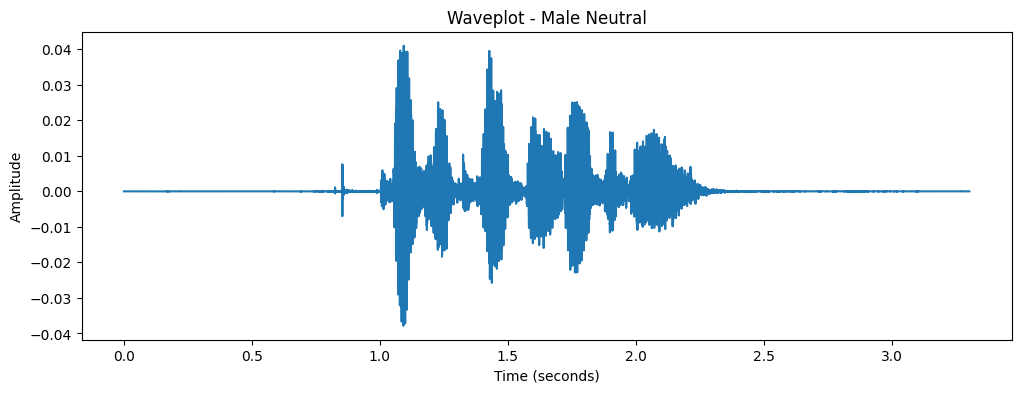

In [ ]:
# Generate the time axis
time = np.linspace(0, len(data)/sr, num=len(data))

plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveplot - Male Neutral')
plt.show()


In [ ]:
# len(data)/sr

In [ ]:
# sr

CREATE LOG MEL SPECTROGRAM

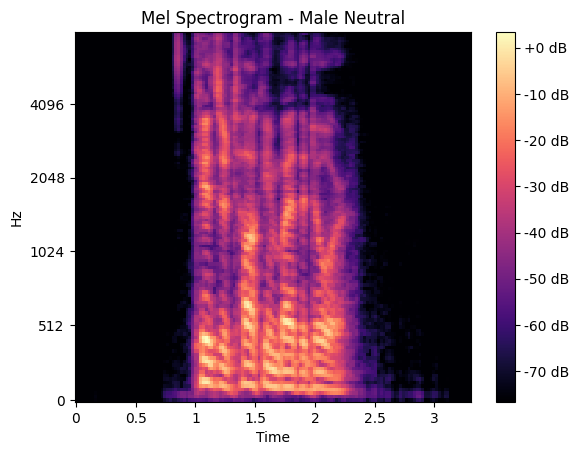

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.colorbar(format='%+2.0f dB');

# PLAY AUDIO FILE
ipd.Audio(data=data, rate=sr)

## Female calm

In [ ]:
data, sr = librosa.load('/content/audio/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')

DISPLAY WAVEPLOT

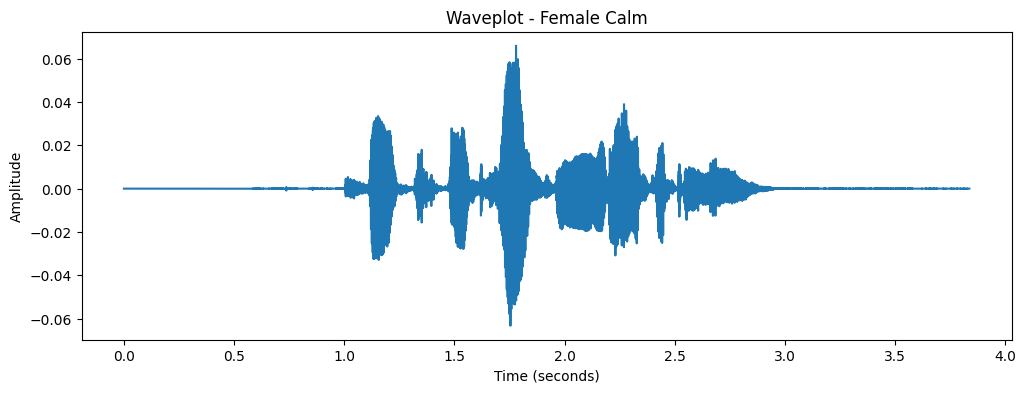

In [ ]:
# Generate the time axis
time = np.linspace(0, len(data)/sr, num=len(data))

plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveplot - Female Calm')
plt.show()

CREATE LOG MEL SPECTROGRAM

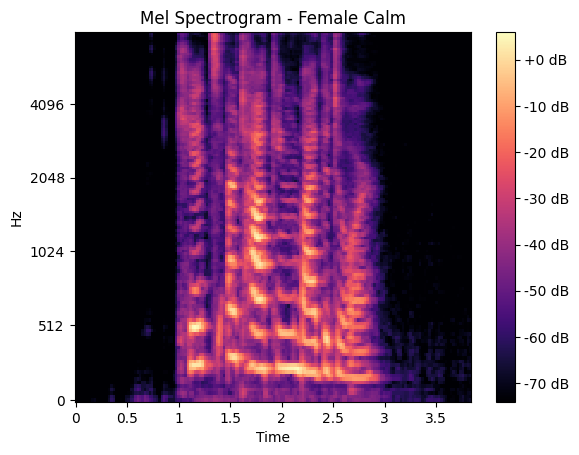

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.colorbar(format='%+2.0f dB');

# PLAY AUDIO FILE
ipd.Audio(data=data, rate=sr)

## Male Happy

In [ ]:
data, sr = librosa.load('/content/audio/audio_speech_actors_01-24/Actor_03/03-01-03-01-01-01-03.wav')

DISPLAY WAVEPLOT

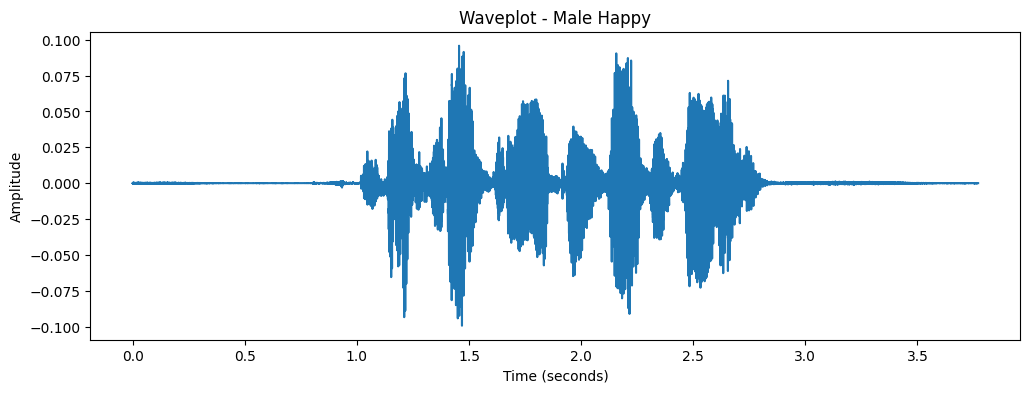

In [ ]:
# Generate the time axis
time = np.linspace(0, len(data)/sr, num=len(data))

plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveplot - Male Happy')
plt.show()


CREATE LOG MEL SPECTROGRAM

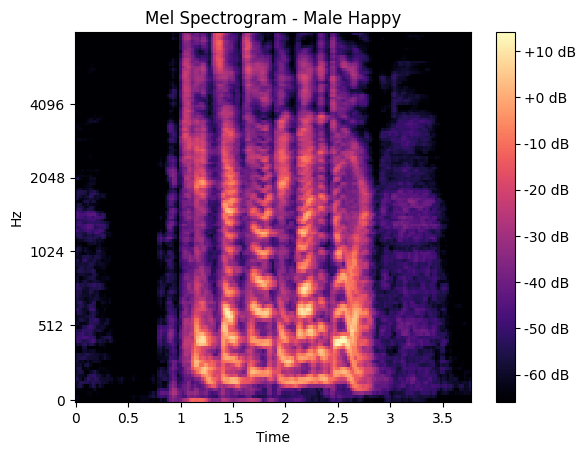

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.colorbar(format='%+2.0f dB');

# PLAY AUDIO FILE
ipd.Audio(data=data, rate=sr)

## Female Fearful

In [ ]:
data, sr = librosa.load('/content/audio/audio_speech_actors_01-24/Actor_06/03-01-06-01-01-01-06.wav')

DISPLAY WAVEPLOT:

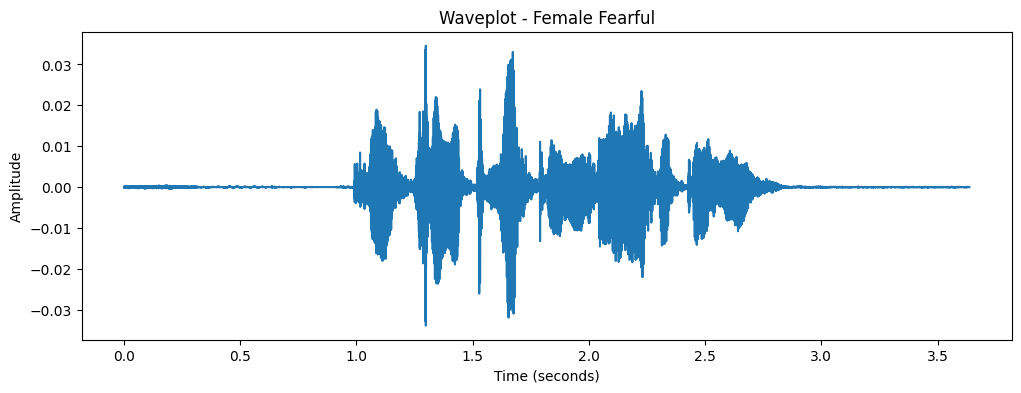

In [ ]:
# Generate the time axis
time = np.linspace(0, len(data)/sr, num=len(data))

plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveplot - Female Fearful')
plt.show()

DISPLAY LOG MEL SPECTROGRAM

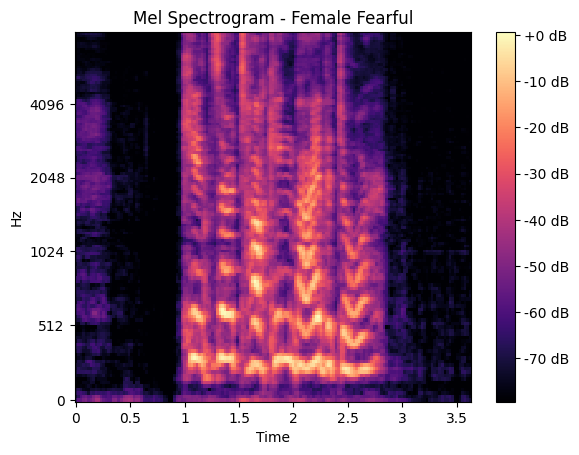

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.colorbar(format='%+2.0f dB');

# PLAY AUDIO FILE
ipd.Audio(data=data, rate=sr)

## Male Angry

In [ ]:
data, sr = librosa.load('/content/audio/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-01-05.wav')


DISPLAY WAVEPLOT

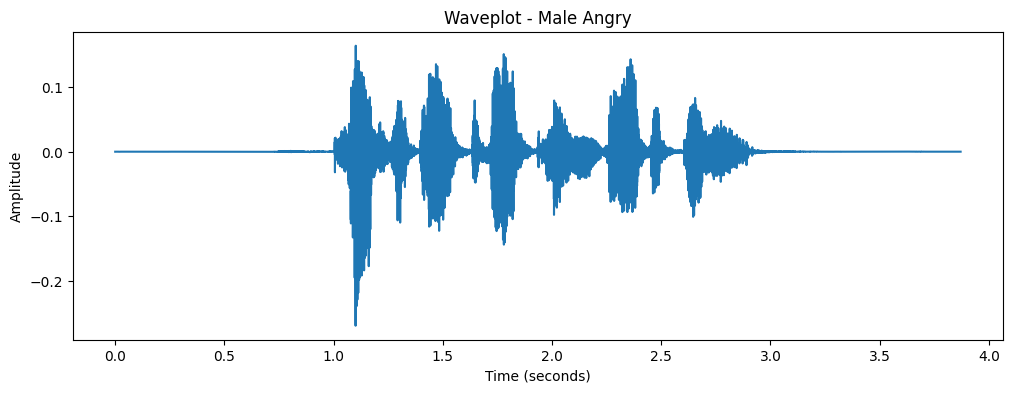

In [ ]:
# Generate the time axis
time = np.linspace(0, len(data)/sr, num=len(data))

plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveplot - Male Angry')
plt.show()

CREATE LOG MEL SPECTROGRAM

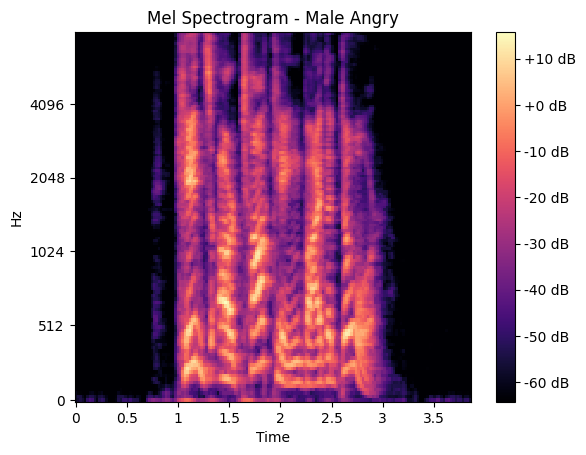

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Angry')
plt.colorbar(format='%+2.0f dB');

# PLAY AUDIO FILE
ipd.Audio(data=data, rate=sr)

## Female Surprised

In [ ]:
data, sr = librosa.load('/content/audio/audio_speech_actors_01-24/Actor_08/03-01-08-01-01-01-08.wav')

DISPLAY WAVEPLOT

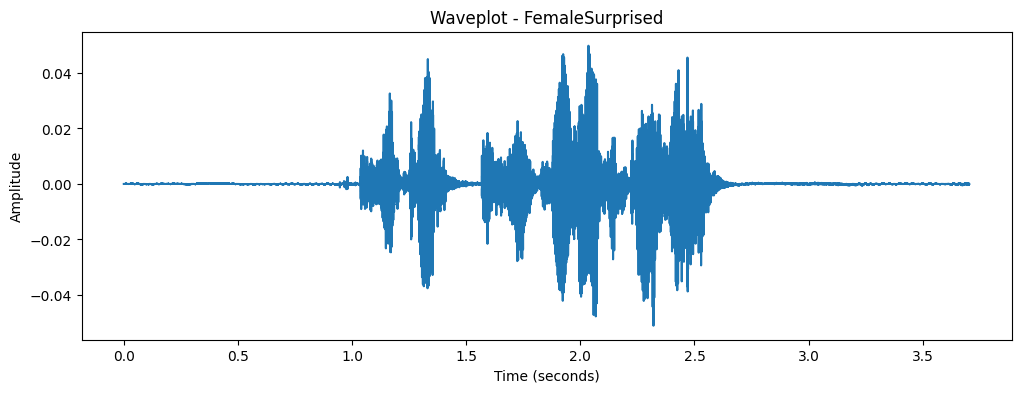

In [ ]:
# Generate the time axis
time = np.linspace(0, len(data)/sr, num=len(data))

plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Waveplot - FemaleSurprised')
plt.show()

 DISPLAY LOG MEL SPECTROGRAM

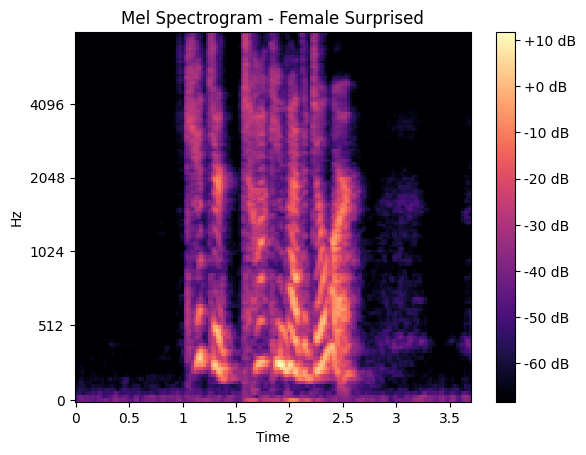

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.colorbar(format='%+2.0f dB');

# PLAY AUDIO FILE
ipd.Audio(data=data, rate=sr)

# Data Preprocessing

## Labeling Audio Files

DIRECTORY OF SOUND FILES

In [ ]:
audio = "/content/audio/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio)
actor_folders.sort()
actor_folders[:]

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

FUNCTION TO EXTRACT ACTOR , GENDER AND SOUND TYPE LABEL

In [ ]:
sound_type = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i)
    for f in filename:
        part = f.split('.')[0].split('-')
        sound_type.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

EXTRACTED LABELS WITH FILEPATH INTO SOUND_DATA

In [ ]:
sound_data = pd.DataFrame(sound_type)
sound_data = sound_data.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
sound_data = pd.concat([pd.DataFrame(gender),sound_data,pd.DataFrame(actor)],axis=1)
sound_data.columns = ['Gender','Sound_Type','Actor']
sound_data = pd.concat([sound_data,pd.DataFrame(file_path, columns = ['path'])],axis=1)
sound_data

,Gender,Sound_Type,Actor,path
0,male,disgust,1,/content/audio/audio_speech_actors_01-24/Actor...
1,male,calm,1,/content/audio/audio_speech_actors_01-24/Actor...
2,male,sad,1,/content/audio/audio_speech_actors_01-24/Actor...
3,male,neutral,1,/content/audio/audio_speech_actors_01-24/Actor...
4,male,surprise,1,/content/audio/audio_speech_actors_01-24/Actor...
...,...,...,...,...
1435,female,happy,24,/content/audio/audio_speech_actors_01-24/Actor...
1436,female,fear,24,/content/audio/audio_speech_actors_01-24/Actor...
1437,female,disgust,24,/content/audio/audio_speech_actors_01-24/Actor...
1438,female,happy,24,/content/audio/audio_speech_actors_01-24/Actor...


ENSURING GENDER,SOUND TYPE, AND ACTOR VALUES:

In [ ]:
print('Path: ',sound_data.path[0])
print('Gender: ',sound_data.Gender[0])
print('Sound Type: ',sound_data.Sound_Type[0])
print('Actor Number: ',sound_data.Actor[0])

Path:  /content/audio/audio_speech_actors_01-24/Actor_01/03-01-07-01-02-02-01.wav
Gender:  male
Sound Type:  disgust
Actor Number:  1


DISTRIBUTION OF CLASSES

<Axes: >

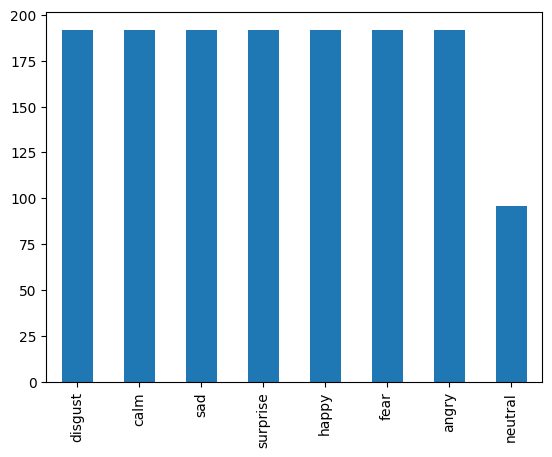

In [ ]:
sound_data.Sound_Type.value_counts().plot(kind='bar')

EXPORT TO CSV

In [ ]:
sound_data.to_csv('/content/audio.csv')

## Feature Extraction

ITERATE OVER ALL SOUND FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DATA FOR MODELING

In [ ]:
data = pd.DataFrame(columns=['mel_spectrogram'])
counter=0

for index,path in enumerate(sound_data.path):
    X, sr = librosa.load(path, duration=3,sr=44100,offset=0.5)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    log_spectrogram = np.mean(db_spec, axis = 0)
    data.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(data))
data.head()

1440


,mel_spectrogram
0,"[-74.815765, -74.737976, -74.69707, -74.736176..."
1,"[-80.10027, -80.10027, -80.066986, -80.00597, ..."
2,"[-79.946205, -79.946205, -79.946205, -79.94620..."
3,"[-75.48465, -75.44205, -75.555984, -75.2059, -..."
4,"[-66.9028, -66.9028, -66.9028, -66.9028, -66.9..."


TURN ARRAY INTO LIST AND JOIN WITH SOUND_DATA TO GET CORRESPONDING SOUND LABELS

In [ ]:
data_combined = pd.concat([sound_data,pd.DataFrame(data['mel_spectrogram'].values.tolist())],axis=1)
data_combined = data_combined.fillna(0)

DROP PATH COLUMN

In [ ]:
data_combined.drop(columns='path',inplace=True)

NOW THE COMBINED DATA IS:

In [ ]:
data_combined.head()

,Gender,Sound_Type,Actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,disgust,1,-74.815765,-74.737976,-74.697067,-74.736176,-74.449440,-74.650696,-74.815765,...,-74.815765,-74.815765,-74.815765,-74.815765,-74.815765,-74.815765,-74.815765,-74.815765,-74.815765,-74.815765
1,male,calm,1,-80.100273,-80.100273,-80.066986,-80.005966,-80.100273,-80.100273,-80.100273,...,-79.885315,-80.100273,-80.100273,-80.054802,-80.029945,-79.991379,-80.052818,-80.087914,-79.898880,-79.815804
2,male,sad,1,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,...,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205,-79.946205
3,male,neutral,1,-75.484650,-75.442047,-75.555984,-75.205902,-75.232491,-75.321342,-75.655762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,surprise,1,-66.902802,-66.902802,-66.902802,-66.902802,-66.902802,-66.902802,-66.902802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Prepping Data for Modeling

TRAIN TEST SPLIT DATA

In [ ]:
train,test = train_test_split(data_combined, test_size=0.2, random_state=0,stratify=data_combined[['Sound_Type','Gender','Actor']])

In [ ]:
x_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['Gender'])

In [ ]:
x_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['Gender'])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1152, 259)
(288, 259)


# Base Model

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="stratified")
dummy.fit(x_train, y_train)
dummy.predict(x_test)
dummy.score(x_test, y_test)

0.10069444444444445

In [ ]:
from sklearn import tree

classi = tree.DecisionTreeClassifier()
classi = classi.fit(x_train, y_train)
classi.predict(x_test)
classi.score(x_test, y_test)


0.3854166666666667

# Data Preprocessing

In [ ]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
693,-0.487280,-0.502217,-0.517110,-0.472531,-0.507971,-0.492572,-0.504476,-0.536442,-0.511522,-0.505110,...,-0.634457,-0.635526,-0.661851,-0.653625,-0.719259,-0.723433,-0.703837,-0.766882,-0.784879,-0.800980
424,0.366717,0.320964,0.310394,0.275800,0.270273,0.276377,0.274345,0.271193,0.230873,0.219402,...,-0.353904,-0.340905,-0.384305,-0.386185,-0.450181,-0.449385,-0.448204,-0.527653,-0.546346,-0.546982
1273,-0.063033,-0.092117,-0.059134,0.625928,0.753800,0.468323,0.413446,0.265439,0.064209,-0.024462,...,-0.512597,-0.508027,-0.546654,-0.547158,-0.605990,-0.603791,-0.601515,-0.671688,-0.673736,-0.673649
1426,-0.058199,-0.102635,0.086439,0.103194,-0.079569,-0.047177,-0.060324,-0.090527,-0.002211,0.168582,...,-0.510713,-0.507219,1.954511,1.957401,1.772378,1.774498,1.775354,1.591467,1.590494,1.587813
855,0.559613,0.500883,0.506326,0.501594,0.473805,0.468549,0.462764,0.466688,0.439505,0.422628,...,2.110162,2.114904,1.954511,1.957401,1.772378,1.774498,1.775354,1.591467,1.590494,1.587813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1.060590,1.100632,1.096498,0.996976,0.937023,0.905483,0.889795,0.879208,0.863722,0.844928,...,-0.083402,-0.071817,-0.135927,-0.138279,-0.216051,-0.216924,-0.213439,-0.304463,-0.309305,-0.309770
1133,-1.278444,-1.254560,-1.216398,-1.198635,-1.221301,-1.219134,-1.244575,-1.237554,-1.212809,-1.177613,...,-0.961856,-0.953872,-0.985552,-0.998959,1.772378,1.774498,1.775354,1.591467,1.590494,1.587813
2,-1.374059,-1.390624,-1.382372,-1.378461,-1.376953,-1.371959,-1.368662,-1.365172,-1.365530,-1.361984,...,-1.023537,-1.020367,-1.037194,-1.035608,-1.069320,-1.067105,-1.064553,-1.112573,-1.114831,-1.114204
636,-1.498627,-1.266623,-1.239151,-1.210193,-1.207194,-1.362327,-1.293096,-1.363875,-1.380255,-1.282627,...,-1.019596,-1.044004,-1.072180,-1.017334,-1.073631,-1.058679,-1.038263,-1.099794,-1.080588,-1.006313


TURN DATA INTO ARRAYS FOR KERAS

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape

(1152, 259)

In [ ]:
x_train

array([[-0.48727999, -0.50221652, -0.51711039, ..., -0.76688221,
        -0.78487876, -0.8009802 ],
       [ 0.36671729,  0.320964  ,  0.31039379, ..., -0.52765256,
        -0.54634561, -0.54698177],
       [-0.06303286, -0.09211699, -0.05913394, ..., -0.67168777,
        -0.67373633, -0.67364873],
       ...,
       [-1.37405945, -1.39062379, -1.38237171, ..., -1.11257307,
        -1.11483131, -1.11420419],
       [-1.49862655, -1.26662292, -1.23915069, ..., -1.09979439,
        -1.08058846, -1.00631288],
       [-0.43646942, -0.47430893, -0.48224783, ...,  1.59146672,
         1.59049449,  1.58781257]])

ONE HOT ENCODE THE TARGET

In [ ]:
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


RESHAPE DATA

In [ ]:
x_train = x_train[:,:]
x_test = x_test[:,:]

# Initial Model : 1D CNN LAYERS

In [ ]:
model = Sequential()

model.add(layers.Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2, strides=2))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 255, 64)           384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 64)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 64)          256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 123, 128)          41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 61, 128)          0         
 1D)                                                             
                                                        

## batch_size=32 || epochs=50

In [ ]:
history1 = model.fit(x_train, y_train,batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
36/36 [==============================] - 15s 14ms/step - loss: 2.6721 - accuracy: 0.2908 - val_loss: 2.0213 - val_accuracy: 0.2396
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 1.5000 - accuracy: 0.4514 - val_loss: 2.6293 - val_accuracy: 0.1771
Epoch 3/50
36/36 [==============================] - 0s 7ms/step - loss: 1.2220 - accuracy: 0.5330 - val_loss: 2.4976 - val_accuracy: 0.2188
Epoch 4/50
36/36 [==============================] - 0s 8ms/step - loss: 1.0769 - accuracy: 0.6250 - val_loss: 3.1594 - val_accuracy: 0.1771
Epoch 5/50
36/36 [==============================] - 0s 7ms/step - loss: 0.9206 - accuracy: 0.6701 - val_loss: 2.6451 - val_accuracy: 0.2153
Epoch 6/50
36/36 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.7422 - val_loss: 3.6839 - val_accuracy: 0.1771
Epoch 7/50
36/36 [==============================] - 0s 7ms/step - loss: 0.5553 - accuracy: 0.7986 - val_loss: 3.1791 - val_accuracy: 0.2431
Epoch 8/50
36/36 [

PLOT MODEL HISTORY OF ACCURACY

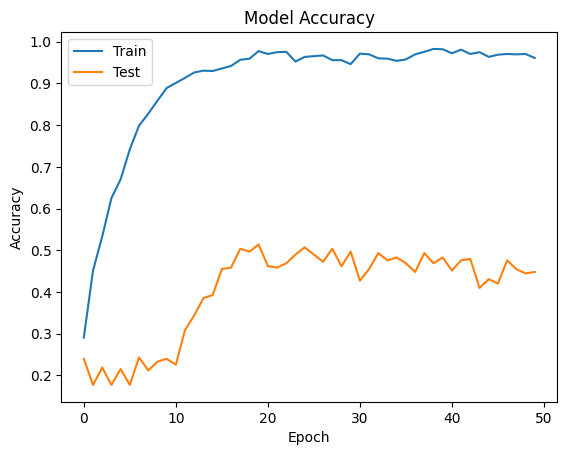

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

PLOT MODEL HISTORY OF LOSS

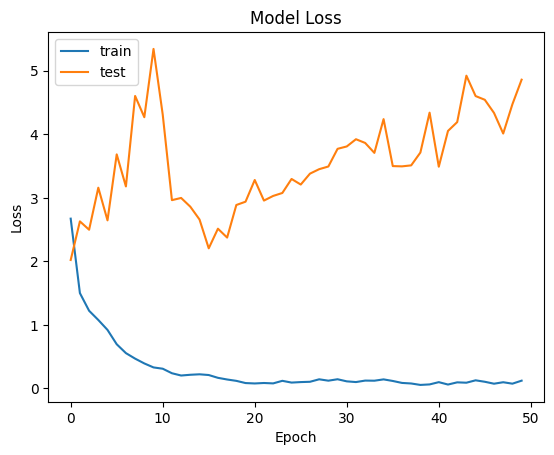

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Post-Model Analysis

LOSS AND ACCURACY PERCENTAGE ON TEST SET

In [ ]:
print("Loss is - " , model.evaluate(x_test,y_test)[0])

9/9 [==============================] - 0s 3ms/step - loss: 4.8597 - accuracy: 0.4479
Loss is -  4.859650135040283


In [ ]:
print("\nAccuracy is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 3ms/step - loss: 4.8597 - accuracy: 0.4479

Accuracy is -  44.79166567325592 %


## batch_size=64 || epochs=50

In [ ]:
history2 = model.fit(x_train, y_train,batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
18/18 [==============================] - 2s 24ms/step - loss: 0.0907 - accuracy: 0.9731 - val_loss: 4.6230 - val_accuracy: 0.4722
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 4.4575 - val_accuracy: 0.4896
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 4.4484 - val_accuracy: 0.4757
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 4.5152 - val_accuracy: 0.4757
Epoch 5/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 4.3255 - val_accuracy: 0.4688
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9939 - val_loss: 4.1823 - val_accuracy: 0.4792
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 0.0097 - accuracy: 0.9974 - val_loss: 4.1872 - val_accuracy: 0.4792
Epoch 8/50
18/18 

PLOT MODEL HISTORY OF ACCURACY

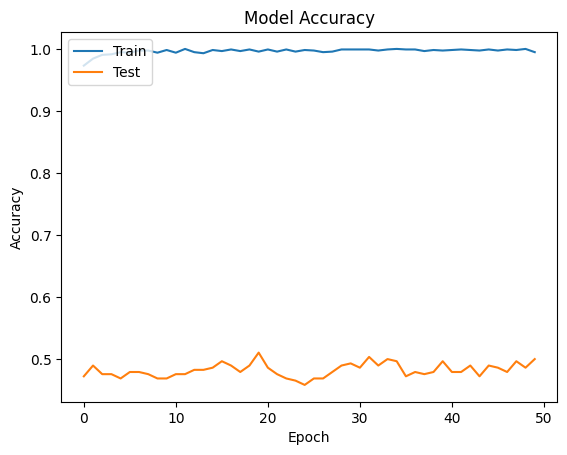

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

PLOT MODEL HISTORY OF LOSS

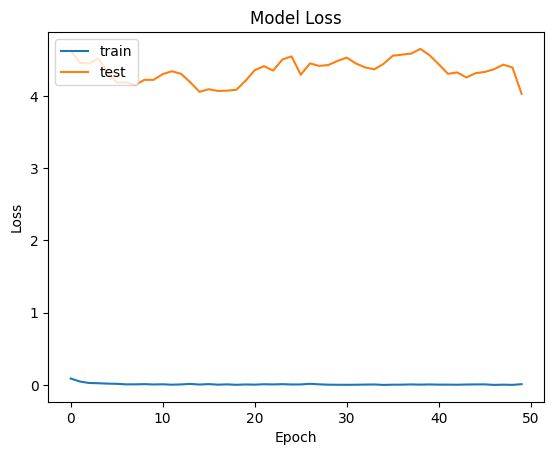

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Post-Model Analysis

LOSS AND ACCURACY PERCENTAGE ON TEST SET

In [ ]:
print("Loss is - " , model.evaluate(x_test,y_test)[0])

9/9 [==============================] - 0s 4ms/step - loss: 4.0289 - accuracy: 0.5000
Loss is -  4.028918266296387


In [ ]:
print("\nAccuracy is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 3ms/step - loss: 4.0289 - accuracy: 0.5000

Accuracy is -  50.0 %


## batch_size=128 || epochs=50

In [ ]:
history3 = model.fit(x_train, y_train,batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
9/9 [==============================] - 1s 20ms/step - loss: 0.0111 - accuracy: 0.9948 - val_loss: 4.0161 - val_accuracy: 0.5069
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 4.1133 - val_accuracy: 0.4965
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 4.1769 - val_accuracy: 0.5000
Epoch 4/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 4.1914 - val_accuracy: 0.5069
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 4.2050 - val_accuracy: 0.5069
Epoch 6/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 4.2129 - val_accuracy: 0.5069
Epoch 7/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.2489 - val_accuracy: 0.5104
Epoch 8/50
9/9 [===========

PLOT MODEL HISTORY OF ACCURACY

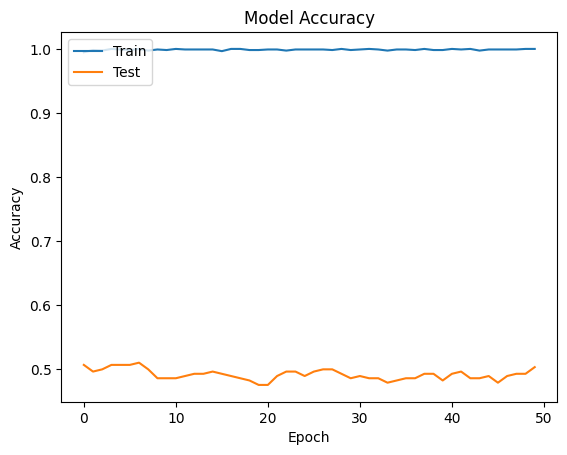

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

PLOT MODEL HISTORY OF LOSS

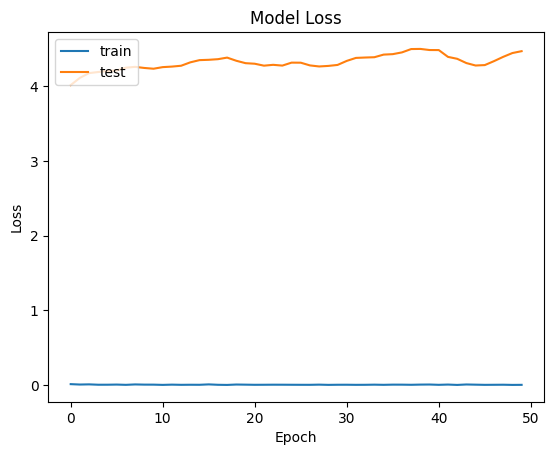

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Post-Model Analysis

LOSS AND ACCURACY PERCENTAGE ON TEST SET

In [ ]:
print("Loss is - " , model.evaluate(x_test,y_test)[0])

9/9 [==============================] - 0s 3ms/step - loss: 4.4704 - accuracy: 0.5035
Loss is -  4.4703826904296875


In [ ]:
print("\nAccuracy is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 3ms/step - loss: 4.4704 - accuracy: 0.5035

Accuracy is -  50.34722089767456 %


## batch_size=32 || epochs=100

In [ ]:
history11 = model.fit(x_train, y_train,batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
36/36 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 4.6394 - val_accuracy: 0.4896
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 4.6617 - val_accuracy: 0.4896
Epoch 3/100
36/36 [==============================] - 0s 8ms/step - loss: 0.1654 - accuracy: 0.9549 - val_loss: 5.0854 - val_accuracy: 0.4757
Epoch 4/100
36/36 [==============================] - 0s 10ms/step - loss: 0.5141 - accuracy: 0.8785 - val_loss: 6.0141 - val_accuracy: 0.3924
Epoch 5/100
36/36 [==============================] - 0s 10ms/step - loss: 0.7782 - accuracy: 0.7934 - val_loss: 7.0836 - val_accuracy: 0.3507
Epoch 6/100
36/36 [==============================] - 0s 10ms/step - loss: 0.5563 - accuracy: 0.8403 - val_loss: 4.2746 - val_accuracy: 0.4479
Epoch 7/100
36/36 [==============================] - 0s 10ms/step - loss: 0.3585 - accuracy: 0.8906 - val_loss: 4.6550 - val_accuracy: 0.4688
Epoch 8/1

PLOT MODEL HISTORY OF ACCURACY

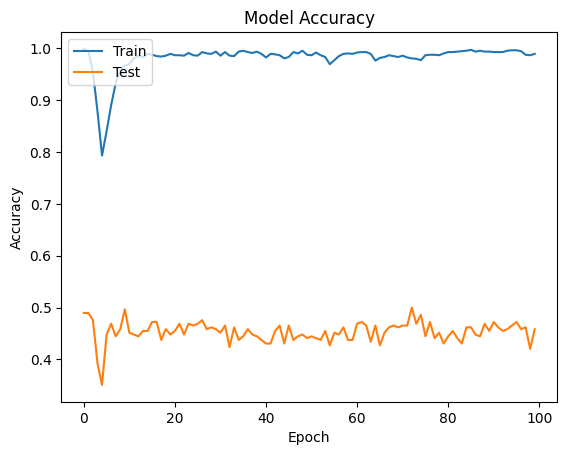

In [ ]:
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

PLOT MODEL HISTORY OF LOSS

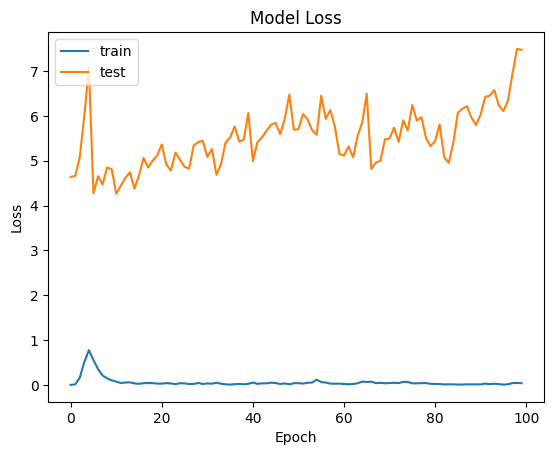

In [ ]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Post-Model Analysis

LOSS AND ACCURACY PERCENTAGE ON TEST SET

In [ ]:
print("Loss is - " , model.evaluate(x_test,y_test)[0])

9/9 [==============================] - 0s 3ms/step - loss: 7.4723 - accuracy: 0.4583
Loss is -  7.47225284576416


In [ ]:
print("\nAccuracy is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 3ms/step - loss: 7.4723 - accuracy: 0.4583

Accuracy is -  45.83333432674408 %


## batch_size=64 || epochs=100

In [ ]:
history12 = model.fit(x_train, y_train,batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.9913 - val_loss: 6.7670 - val_accuracy: 0.4375
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.9905 - val_loss: 6.2279 - val_accuracy: 0.4271
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 6.3172 - val_accuracy: 0.4618
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 6.4615 - val_accuracy: 0.4826
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.9948 - val_loss: 6.3134 - val_accuracy: 0.4479
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 6.2464 - val_accuracy: 0.4514
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9974 - val_loss: 6.5290 - val_accuracy: 0.4653
Epoch 8/10

PLOT MODEL HISTORY OF ACCURACY

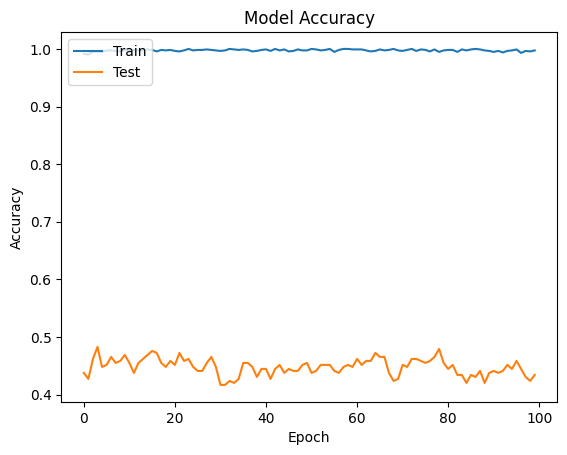

In [ ]:
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

PLOT MODEL HISTORY OF LOSS

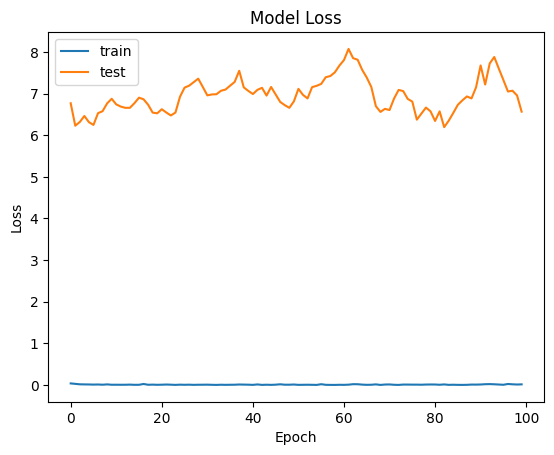

In [ ]:
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Post-Model Analysis

LOSS AND ACCURACY PERCENTAGE ON TEST SET

In [ ]:
print("Loss is - " , model.evaluate(x_test,y_test)[0])

9/9 [==============================] - 0s 3ms/step - loss: 6.5660 - accuracy: 0.4340
Loss is -  6.566028118133545


In [ ]:
print("\nAccuracy is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 3ms/step - loss: 6.5660 - accuracy: 0.4340

Accuracy is -  43.40277910232544 %


## batch_size=128 || epochs=100

In [ ]:
history13 = model.fit(x_train, y_train,batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 6.5326 - val_accuracy: 0.4306
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0077 - accuracy: 0.9965 - val_loss: 6.5471 - val_accuracy: 0.4410
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 6.5768 - val_accuracy: 0.4514
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 6.6280 - val_accuracy: 0.4514
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 6.6777 - val_accuracy: 0.4549
Epoch 6/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 6.6607 - val_accuracy: 0.4583
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0124 - accuracy: 0.9957 - val_loss: 6.7259 - val_accuracy: 0.4583
Epoch 8/100
9/9 [===

PLOT MODEL HISTORY OF ACCURACY

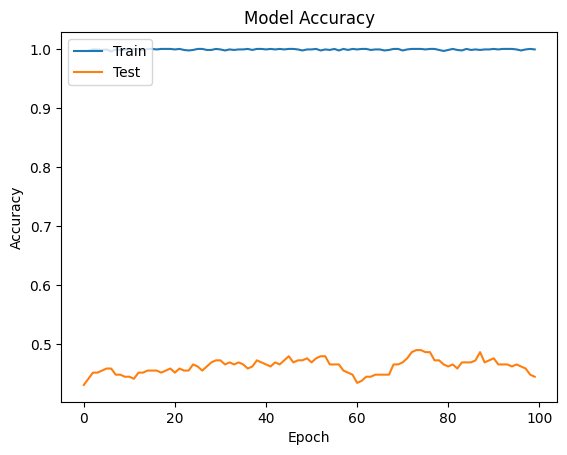

In [ ]:
plt.plot(history13.history['accuracy'])
plt.plot(history13.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

PLOT MODEL HISTORY OF LOSS

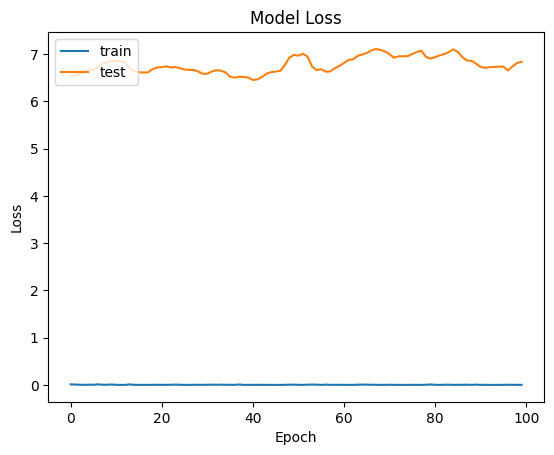

In [ ]:
plt.plot(history13.history['loss'])
plt.plot(history13.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Post-Model Analysis

LOSS AND ACCURACY PERCENTAGE ON TEST SET

In [ ]:
print("Loss is - " , model.evaluate(x_test,y_test)[0])

9/9 [==============================] - 0s 4ms/step - loss: 6.8377 - accuracy: 0.4444
Loss is -  6.837671756744385


In [ ]:
print("\nAccuracy is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 4ms/step - loss: 6.8377 - accuracy: 0.4444

Accuracy is -  44.44444477558136 %


# ACTUAL VALUES  |  PRIDICTION VALUES

In [ ]:
# PREDICTIONS
pred_value = model.predict(x_test)
pred_value = pred_value.argmax(axis=1)
pred_value = pred_value.astype(int).flatten()
pred_value = (lb.inverse_transform((pred_value)))
pred_value = pd.DataFrame({'Predicted Values': pred_value})

# ACTUAL LABELS
act_value = y_test.argmax(axis=1)
act_value = act_value.astype(int).flatten()
act_value = (lb.inverse_transform((act_value)))
act_value = pd.DataFrame({'Actual Values': act_value})

# FINAL DATA
final_data = act_value.join(pred_value)


9/9 [==============================] - 0s 3ms/step


In [ ]:
final_data[10:15]

,Actual Values,Predicted Values
10,sad,sad
11,angry,angry
12,calm,sad
13,sad,neutral
14,fear,fear


## CONFUSION MATRIX OF ACTUAL VS. PREDICTION

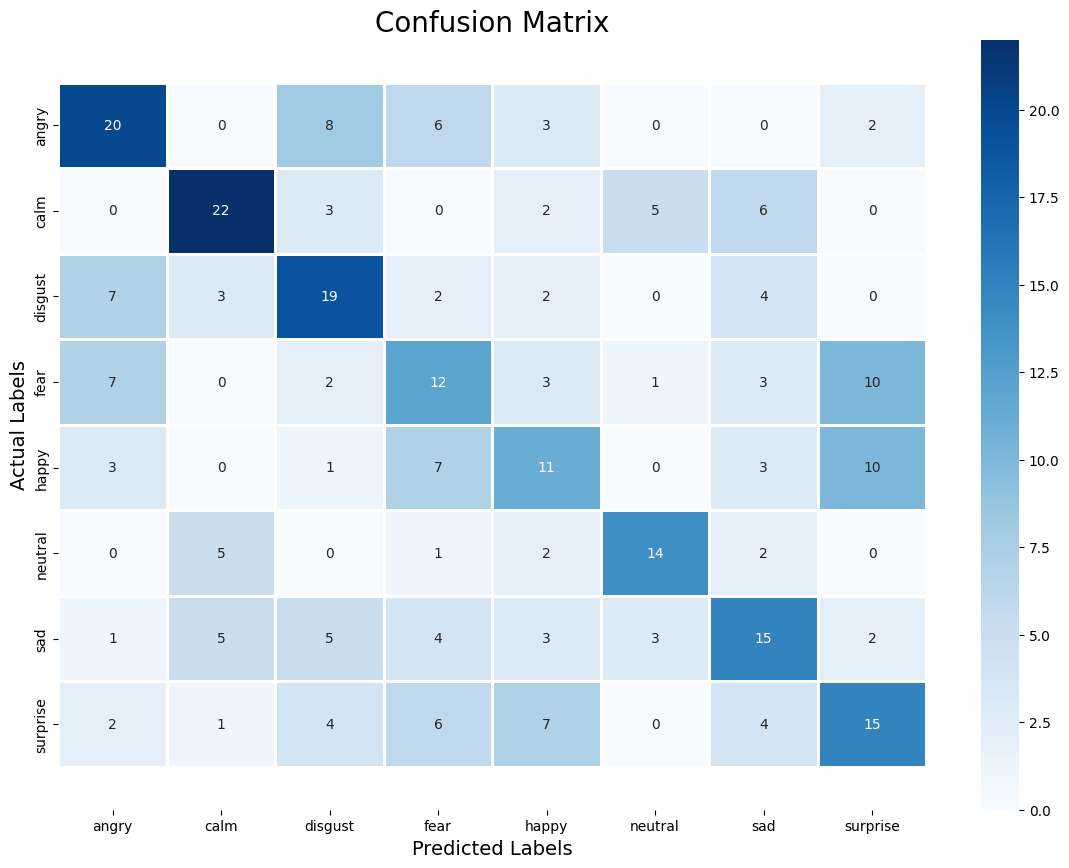

In [ ]:
con_mat = confusion_matrix(act_value, pred_value)
plt.figure(figsize = (14, 10))
con_mat = pd.DataFrame(con_mat , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(con_mat, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(act_value, pred_value, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.50      0.51      0.51        39
        calm       0.61      0.58      0.59        38
     disgust       0.45      0.51      0.48        37
        fear       0.32      0.32      0.32        38
       happy       0.33      0.31      0.32        35
     neutral       0.61      0.58      0.60        24
         sad       0.41      0.39      0.40        38
    surprise       0.38      0.38      0.38        39

    accuracy                           0.44       288
   macro avg       0.45      0.45      0.45       288
weighted avg       0.44      0.44      0.44       288



# Hyperparameter Tuning

TRAIN TEST SPLIT DATA

In [ ]:
train,test = train_test_split(data_combined, test_size=0.2, random_state=0, stratify=data_combined[['Gender','Actor']])

x_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['Gender'])

x_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['Gender'])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1152, 259)
(288, 259)


NORMALIZE DATA

In [ ]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

TURN DATA INTO ARRAYS

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

RESHAPE

In [ ]:
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

In [ ]:
from keras.utils import np_utils, to_categorical
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BUILD FUNCTION FOR KERAS CLASSIFIER

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
def make_classifier(optimizer=opt):
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=(2),strides=(2)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(MaxPooling1D(pool_size=(2),strides=(2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [ ]:
y_trainHot = np.argmax(y_train, axis=1)

GRID SEARCH PARAMETERS TO FIND BEST VALUES

In [ ]:
keras_classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [32, 34, 36],
    'nb_epoch': [20, 40, 60],
    'optimizer':['adam','SGD']}

grid_cv = GridSearchCV(estimator=keras_classifier, param_grid=params, scoring='accuracy', cv=5)
grid_cv = grid_cv.fit(x_train,y_trainHot)

36/36 [==============================] - 2s 8ms/step - loss: 2.6896 - accuracy: 0.2595


In [ ]:
grid_cv.best_params_

{'batch_size': 32, 'nb_epoch': 20, 'optimizer': 'SGD'}

In [ ]:
grid_cv.best_score_

0.3594240542066629